In [ ]:
import sys
import subprocess


def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])


packages = ["requests", "pandas", "matplotlib"]


for pkg in packages:
    try:
        __import__(pkg)
    except ImportError:
        print(f"Instalando {pkg}...")
        install(pkg)

print("Todos os pacotes foram instalados")

Todos os pacotes foram instalados


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path
import time
from pandas import json_normalize
import statistics

In [4]:
api_key = "b6d393babc6a9d6c858e42525af78ce4"
limit = 500
url = "http://ws.audioscrobbler.com/2.0/"


params = {
    "method": "chart.gettoptracks",
    "api_key": api_key,
    "format": "json",
    "limit": limit
}


try:
    response = requests.get(url, params=params, timeout=10)
    response.raise_for_status()
    data = response.json()
    print(f"{len(data['tracks']['track'])} registros")
    
except requests.exceptions.RequestException as e:
    print("Erro na requisição", e)
    data = None


500 registros


In [ ]:
try:
    df = json_normalize(data["tracks"]["track"], sep="_")
    df["playcount"] = df["playcount"].astype(int)
    df["listeners"] = df["listeners"].astype(int)
    df = df[["name", "artist_name", "playcount", "listeners"]]
    print("Dataframe criado")
    df.head()
    
except Exception as e:
    print("Erro ao processar os dados", e)


Dataframe criado


In [ ]:
try:
    
    listeners = df["listeners"]

    print("Estatisticas sobre ouvintes:")
    print(f"Média: {statistics.mean(listeners):.2f}")
    print(f"Mediana: {statistics.median(listeners):.2f}")
    print(f"Desvio Padrão: {statistics.pstdev(listeners):.2f}")

except Exception as e:
    print("Erro ao calcular as estatisticas", e)


Estatisticas sobre ouvintes:
Média: 1260834.06
Mediana: 1228151.50
Desvio Padrão: 713470.70


In [9]:
output_dir = Path("arquivos_gerados")
output_dir.mkdir(exist_ok=True)
csv_path = output_dir / "lastfm_toptracks.csv"


try:
    df.to_csv(csv_path, index=False, encoding="utf-8")
    print(f"Csv salvo")

except Exception as e:
    print("Erro ao salvar o arquivo csv", e)


Csv salvo


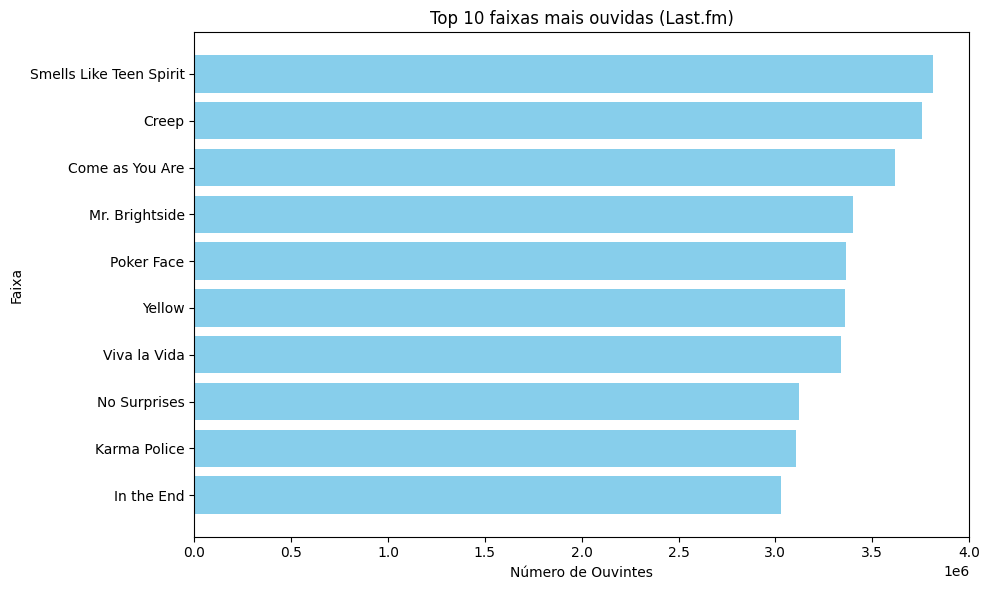

Gráfico salvo


In [ ]:
try:
    
    top10 = df.nlargest(10, "listeners")

    plt.figure(figsize=(10,6))
    plt.barh(top10["name"], top10["listeners"], color="skyblue")
    plt.xlabel("Número de Ouvintes")
    plt.ylabel("Faixa")
    plt.title("Top 10 faixas mais ouvidas (Last.fm)")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    graph_path = output_dir / "top10_tracks.png"
    plt.savefig(graph_path, dpi=300)
    plt.show()
    print(f"Gráfico salvo")

except Exception as e:
    print("Erro ao gerar o gráfico", e)


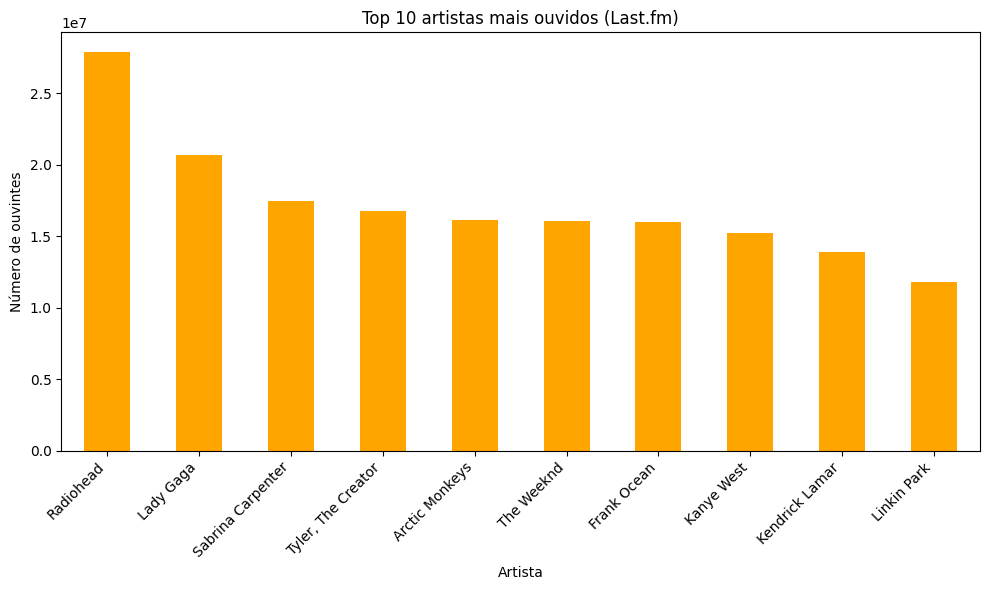

Gráfico salvo


In [ ]:
try:

    top_artists = df.groupby("artist_name")["listeners"].sum().nlargest(10)

    plt.figure(figsize=(10,6))
    top_artists.plot(kind='bar', color='orange')
    plt.ylabel("Número de ouvintes")
    plt.xlabel("Artista")
    plt.title("Top 10 artistas mais ouvidos (Last.fm)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    graph_path = output_dir / "top10_artists.png"
    plt.savefig(graph_path, dpi=300)
    plt.show()
    print(f"Gráfico salvo")
    
except Exception as e:
        print("Erro ao gerar gráfico", e)